In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from PIL import Image

In [2]:
class SimpleNet1(nn.Module):
  def __init__(self):
    super(SimpleNet1, self).__init__()
    self.fc1 = nn.Linear(8, 2)

  def forward(self, x):
    print(x)
    x = x.view(-1, 8)
    tmp = self.fc1(x)
    print(self.fc1.weight, self.fc1.bias)
    print(tmp)
    x = F.relu(tmp)
    print(x)
    return x

In [3]:
sn = SimpleNet1()
sn(torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float))

tensor([1., 2., 3., 4., 5., 6., 7., 8.])
Parameter containing:
tensor([[-0.0739, -0.1611, -0.2601,  0.1656,  0.0647,  0.2444, -0.1028,  0.1149],
        [-0.1234, -0.1240,  0.0006, -0.1304, -0.0416, -0.3142,  0.2314,  0.2554]],
       requires_grad=True) Parameter containing:
tensor([-0.2700,  0.0471], requires_grad=True)
tensor([[1.2060, 0.7258]], grad_fn=<AddmmBackward0>)
tensor([[1.2060, 0.7258]], grad_fn=<ReluBackward0>)


tensor([[1.2060, 0.7258]], grad_fn=<ReluBackward0>)

In [4]:
class CNNNet1(nn.Module):
  def __init__(self):
    super(CNNNet1, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(2, 4, kernel_size=2, stride=2),
    )
    self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=1)
    self.cf = nn.Sequential(
        nn.Linear(16, 2)
    )

  def forward(self, x):
    print('x', x)
    x = self.features(x)
    print('features', x)
    x = self.pool(x)
    print('pool', x)
    x = torch.flatten(x)
    print('flatten', x)
    x = self.cf(x)
    print('cf', x)
    return x

In [5]:
cn = CNNNet1()
_ = cn(
    torch.tensor(
        [
            [[1, 2, 3, 4, 5, 6],
              [1, 2, 3, 4, 5, 6],
              [1, 2, 3, 4, 5, 6],
              [1, 2, 3, 4, 5, 6],
              [1, 2, 3, 4, 5, 6],
              [1, 2, 3, 4, 5, 6],],
            [[1, 2, 3, 4, 5, 6],
              [1, 2, 3, 4, 5, 6],
              [1, 2, 3, 4, 5, 6],
              [1, 2, 3, 4, 5, 6],
              [1, 2, 3, 4, 5, 6],
              [1, 2, 3, 4, 5, 6],],
         ],
        dtype=torch.float
    ),
)

x tensor([[[1., 2., 3., 4., 5., 6.],
         [1., 2., 3., 4., 5., 6.],
         [1., 2., 3., 4., 5., 6.],
         [1., 2., 3., 4., 5., 6.],
         [1., 2., 3., 4., 5., 6.],
         [1., 2., 3., 4., 5., 6.]],

        [[1., 2., 3., 4., 5., 6.],
         [1., 2., 3., 4., 5., 6.],
         [1., 2., 3., 4., 5., 6.],
         [1., 2., 3., 4., 5., 6.],
         [1., 2., 3., 4., 5., 6.],
         [1., 2., 3., 4., 5., 6.]]])
features tensor([[[-0.4507, -1.9147, -3.3787],
         [-0.4507, -1.9147, -3.3787],
         [-0.4507, -1.9147, -3.3787]],

        [[ 0.9084,  2.0419,  3.1754],
         [ 0.9084,  2.0419,  3.1754],
         [ 0.9084,  2.0419,  3.1754]],

        [[-0.2482, -0.1465, -0.0447],
         [-0.2482, -0.1465, -0.0447],
         [-0.2482, -0.1465, -0.0447]],

        [[ 0.4299,  1.4822,  2.5346],
         [ 0.4299,  1.4822,  2.5346],
         [ 0.4299,  1.4822,  2.5346]]], grad_fn=<SqueezeBackward1>)
pool tensor([[[-0.4507, -1.9147],
         [-0.4507, -1.9147]],

        

In [6]:
img_transforms = transforms.Compose([
    transforms.ToTensor(),
])

mnist = torchvision.datasets.MNIST("/content/sample_data/data1/", download=True, transform=img_transforms,)
mnist

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:11<00:00, 884650.68it/s] 


Extracting /content/sample_data/data1/MNIST/raw/train-images-idx3-ubyte.gz to /content/sample_data/data1/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 127042.80it/s]


Extracting /content/sample_data/data1/MNIST/raw/train-labels-idx1-ubyte.gz to /content/sample_data/data1/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:07<00:00, 226813.50it/s]


Extracting /content/sample_data/data1/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/sample_data/data1/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1406254.43it/s]

Extracting /content/sample_data/data1/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/sample_data/data1/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/sample_data/data1/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [22]:
train_data_loader = torch.utils.data.DataLoader(
  mnist,
  batch_size=4,
  shuffle=True,
)

val_data_loader = torch.utils.data.DataLoader(
  mnist,
  batch_size=4,
  shuffle=True,
)

In [23]:
class SimpleNet2(nn.Module):
  def __init__(self):
    super(SimpleNet2, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=5, stride=5, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(64, 192, kernel_size=3, stride=2, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
    # self.avgpool = nn.AdaptiveMaxPool2d((3, 3))
    self.classifier = nn.Sequential(
        # nn.Dropout(),
        nn.Linear(192, 1024),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(1024, 1024),
        nn.ReLU(),
        nn.Linear(1024, 10)
    )

  def forward(self, x):
    # print("ok")
    x = self.features(x)
    # print("features", x.shape)
    # x = self.avgpool(x)
    # print("ok")
    x = torch.flatten(x, 1)
    # print("flatten", x.shape)
    x = self.classifier(x)
    # print("ok")
    return x

simplenet = SimpleNet2()
simplenet

import torch.optim as optim

optimizer = optim.Adam(simplenet.parameters(), lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [18]:
simplenet_ = SimpleNet2()
tmp = train_data_loader.dataset.data[0]
tmp = tmp / 255
tmp = torch.tensor(
    [
        [[item.detach().numpy() for item in tmp],],
        [[item.detach().numpy() for item in tmp],],
        [[item.detach().numpy() for item in tmp],],
        [[item.detach().numpy() for item in tmp],],
        [[item.detach().numpy() for item in tmp],],
    ]
)

print(tmp.shape)
simplenet_(tmp)

torch.Size([5, 1, 28, 28])
features torch.Size([5, 192, 1, 1])
flatten torch.Size([5, 192])


tensor([[-0.0272,  0.0184, -0.0436,  0.0100,  0.0107, -0.0081, -0.0171, -0.0069,
         -0.0122,  0.0205],
        [-0.0399,  0.0092, -0.0641,  0.0265,  0.0203, -0.0182,  0.0235, -0.0205,
         -0.0106,  0.0049],
        [-0.0118, -0.0018, -0.0331,  0.0019,  0.0275, -0.0235, -0.0005,  0.0329,
         -0.0154,  0.0364],
        [-0.0169,  0.0216, -0.0392,  0.0180,  0.0348, -0.0229,  0.0216, -0.0043,
         -0.0227,  0.0193],
        [-0.0522, -0.0015, -0.0406,  0.0092,  0.0089, -0.0293, -0.0040, -0.0130,
         -0.0234,  0.0289]], grad_fn=<AddmmBackward0>)

In [24]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
  for epoch in range(1, epochs+1):
    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch in train_loader:
      optimizer.zero_grad()
      inputs, targets = batch
      inputs = inputs.to(device)
      targets = targets.to(device)
      output = model(inputs)
      loss = loss_fn(output, targets)
      loss.backward()
      optimizer.step()
      training_loss += loss.data.item() * inputs.size(0)

    training_loss /= len(train_loader.dataset)
    model.eval()
    num_correct = 0
    num_examples = 0

    for batch in val_loader:
      inputs, targets = batch
      inputs = inputs.to(device)
      output = model(inputs)
      targets = targets.to(device)
      loss = loss_fn(output, targets)
      valid_loss += loss.data.item() * inputs.size(0)
      correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
      num_correct += torch.sum(correct).item()
      num_examples += correct.shape[0]

    valid_loss /= len(val_loader.dataset)
    print(
        f"Epoch: {epoch}",
        f"Training Loss: {training_loss}",
        f"Validation Loss: {valid_loss}",
        f"Acc: {num_correct / num_examples}",
        sep=", ",
    )



In [25]:
if torch.cuda.is_available():
  print("cuda.is_available")
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

simplenet.to(device)

train(
    simplenet,
    optimizer,
    torch.nn.CrossEntropyLoss(),
    train_data_loader,
    val_data_loader,
    epochs=20,
    device=device
)

cuda.is_available
Epoch: 1, Training Loss: 0.38751272263459335, Validation Loss: 0.20244377774220257, Acc: 0.93975
Epoch: 2, Training Loss: 0.2293248297068256, Validation Loss: 0.227026683651756, Acc: 0.9302833333333334
Epoch: 3, Training Loss: 0.21070949700738464, Validation Loss: 0.14187074913005554, Acc: 0.9586833333333333
Epoch: 4, Training Loss: 0.20378533961321466, Validation Loss: 0.16186620696648776, Acc: 0.95155
Epoch: 5, Training Loss: 0.19500143841684045, Validation Loss: 0.15376413775407335, Acc: 0.9586333333333333
Epoch: 6, Training Loss: 0.19519435905222055, Validation Loss: 0.11752554183425491, Acc: 0.9669666666666666
Epoch: 7, Training Loss: 0.185569730077769, Validation Loss: 0.1327968027489456, Acc: 0.9616666666666667
Epoch: 8, Training Loss: 0.18852257454434884, Validation Loss: 0.12784216943927576, Acc: 0.9637
Epoch: 9, Training Loss: 0.1929002167292691, Validation Loss: 0.10677500716624051, Acc: 0.9667833333333333
Epoch: 10, Training Loss: 0.1884274412624609, Valid

In [26]:
torch.save(simplenet.state_dict(), "tmp/simplenet_mnist")
simplenet = SimpleNet2()
simplenet_state_dict = torch.load("tmp/simplenet_mnist")
simplenet.load_state_dict(simplenet_state_dict)

/tmp/ipykernel_1250/1397640534.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  simplenet_state_dict = torch.load("tmp/simplenet_mnist")


<All keys matched successfully>

60000


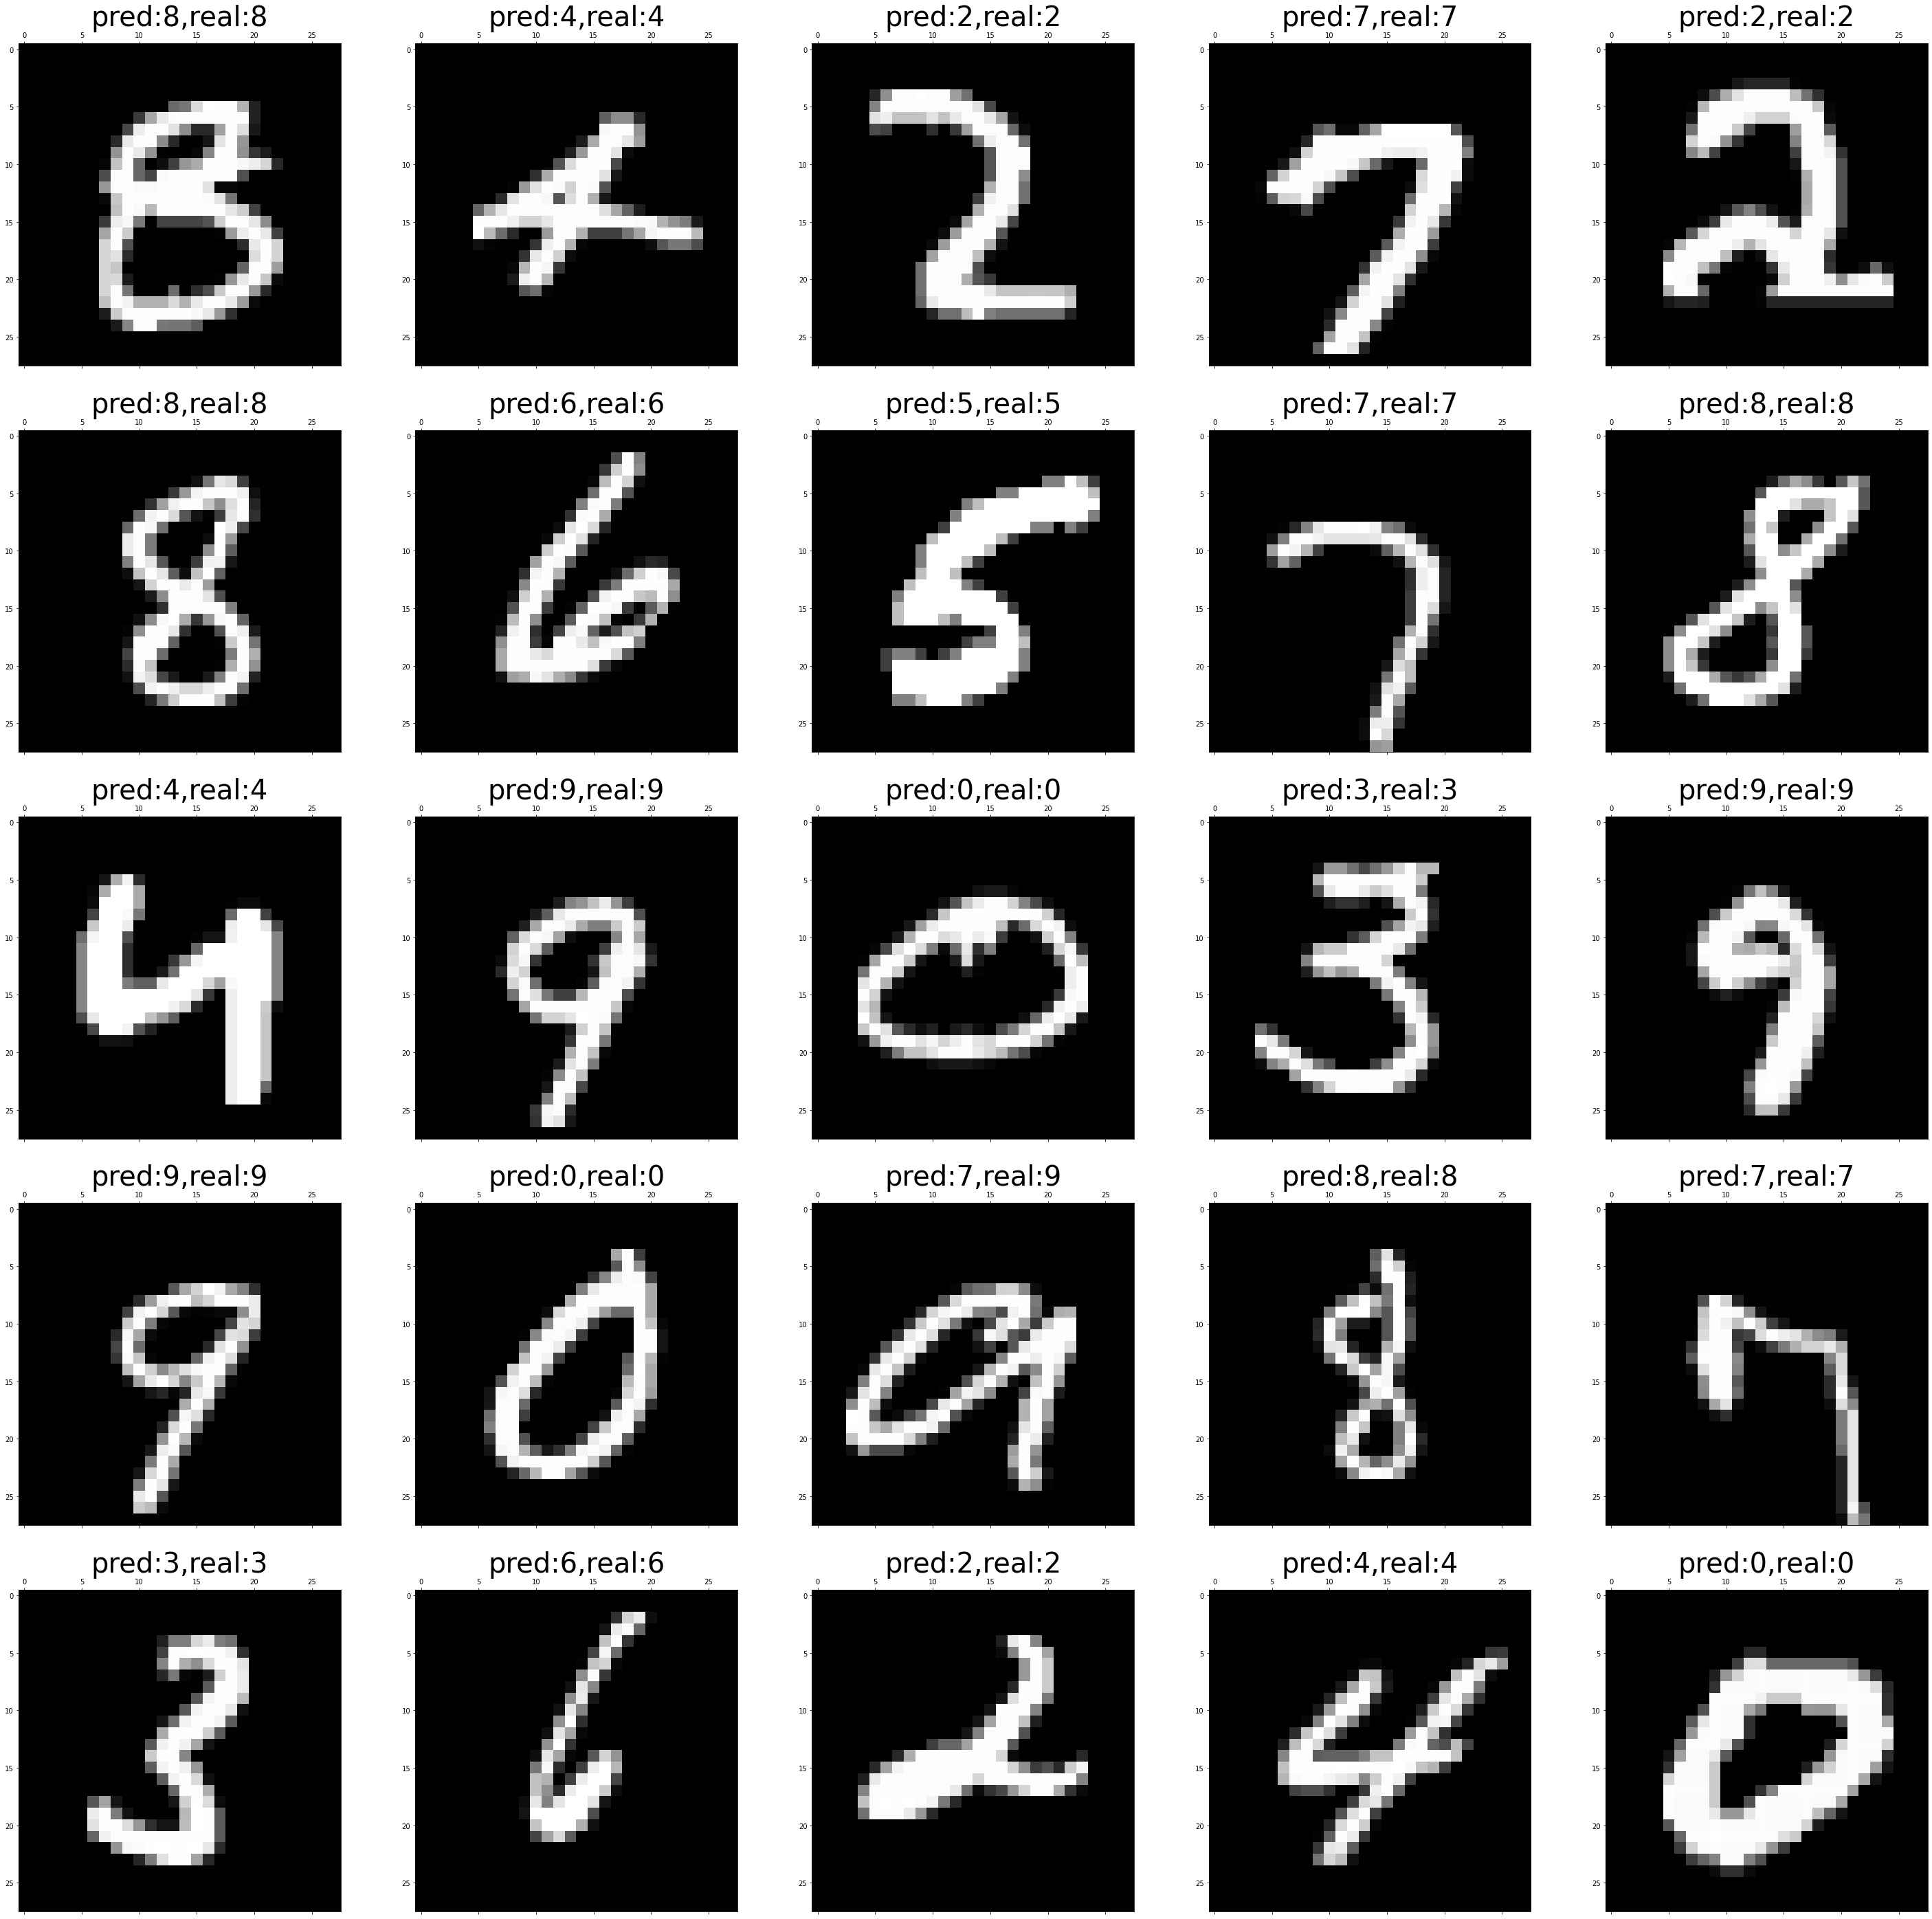

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import random

ds = val_data_loader.dataset
print(len(ds.data))



fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(50, 50))
simplenet.eval()

for i, ax in enumerate(axes.flatten()):
    j = random.randint(0, 6000)
    tmp = ds.data[j]
    ax.matshow(tmp, cmap=plt.cm.gray)
    # preddict
    tmp = tmp / 255
    tmp = torch.tensor(
        [
            [[item.detach().numpy() for item in tmp],],
        ]
    )
    prediction = F.softmax(simplenet(tmp), dim=1)
    prediction = prediction.argmax()
    ax.set_title('pred:' + str(prediction.item()) + ",real:" + str(ds.targets[j].item()), fontsize=40)

plt.show()